# Hate Speech Recognition through Semantic Analysis of Comments

***Analysing comments from Adele's 'Hello' video on YouTube***

## Installations and Imports

In [1]:
# Necessary installations (Run only if needed)
!pip install googletrans
!pip install torch transformers
!pip install nltk
!pip install deep-translator

  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55.1/55.1 kB 896.7 kB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 3.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 133.4/133.4 kB 16.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 58.8/58.8 kB 8.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.6/42.6 kB 5.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 53.6/53.6 kB 7.1 MB/s eta 0:00

In [2]:
# Imports
from googleapiclient.discovery import build
from textblob import TextBlob

from googletrans import Translator, LANGUAGES

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from transformers import pipeline

from matplotlib import pyplot as plt
import seaborn as sns

from transformers import BertTokenizer
from torch.utils.data import DataLoader, Dataset
import torch

from transformers import BertForSequenceClassification, AdamW
from tqdm import tqdm
from sklearn.metrics import classification_report

import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from deep_translator import GoogleTranslator

import csv

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## YouTube API

Run these cells only once if you want to 'extract' comments. Else use the comments that have already been extracted from the pre-processing section.

In [ ]:
 # change the devloper key that corresponds to your google account please. You will have to get an API from google developer console.
youtube = build('youtube', 'v3', developerKey='<your_API_key>')

def fetch_comments(video_id):
    comments = []
    response = youtube.commentThreads().list(part='snippet', videoId=video_id, textFormat='plainText').execute()

    while response:
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            comments.append(comment)

        # taking first 5000 comments
        if(len(comments) == 5000):
          break

        if 'nextPageToken' in response:
            response = youtube.commentThreads().list(part='snippet', videoId=video_id, textFormat='plainText', pageToken=response['nextPageToken']).execute()
        else:
            break

    return comments

def analyze_sentiment(comments):
    sentiments = {'positive': 0, 'neutral': 0, 'negative': 0}

    for comment in comments:
        analysis = TextBlob(comment)  -- see
        if analysis.sentiment.polarity > 0:
            sentiments['positive'] += 1
        elif analysis.sentiment.polarity == 0:
            sentiments['neutral'] += 1
        else:
            sentiments['negative'] += 1

    return sentiments

def translate_english(comments):
  translator = Translator()
  translated_comments = []

  for comment in tqdm(comments):
      if(len(comment)<=5000):
        translated_comment = GoogleTranslator(source='auto', target='en').translate(comment)
        translated_comments.append(translated_comment)

  return translated_comments

video_id = 'YQHsXMglC9A' # "Hello" by Adele Youtube video ID
comments = fetch_comments(video_id)

In [ ]:
comments = translate_english(comments)
#sentiments = analyze_sentiment(comments)
#print(sentiments)

In [ ]:
print(comments)

['im here in 2024 .', 'when i first heard of adele this was my favorite song n still us . love you adele !! üôèüôèüôèüôèüôèüß°üß°‚ù§Ô∏è‚ù§Ô∏èüíõüíõüíöüíöüíöüíôüíôüíôüíúüíúüåπüåπüåπüåπüåπ', 'Me', "This is how I protested. Triumph , natural bud, good friend's, and a stadium  packed with like minded people rocking to Triumph. PS . Peace", 'I want to bay this youtube I from somali üòÆ', '2024', '2024', 'like this song happen to me', "I love the song, I've heard it at least 1000 times‚ò∫‚ò∫‚ò∫‚ò∫", 'There PAGES ISAAC Fern√°ndez', 'ATREYU ISAAC', 'Its meeeeeü•∞', None, 'Super Star', 'The British are a bunch of $hits. But this Lady can come to the US.', 'A incredible voice with incredible lyrics that anyone can relate to.', 'IM HERE', "*It's been 8 Years, Let's See How Many Legends Still Listening to This Masterpiece!* üñ§", 'Helo is a TOTTENHAM FC fan ADELLE pure quality love it from the other side April 2024', 'Beautiful songs', 'Gg', 'Some of us are on the other si

In [ ]:
# Save comments to CSV file
path = "youtube_hello_comments_translated.csv"

with open(path, "w",newline="", encoding="utf-8") as file:
  writer = csv.writer(file)
  writer.writerow(["Comment #", "Comment"])
  for i,comment in enumerate(comments):
    writer.writerow([i,comment])


## Pre-processing comments

Load the csv file for the translated YouTube Comments

In [5]:
path = "/content/youtube_hello_comments_translated.csv"

comments = []

with open(path, "r", encoding="utf-8") as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        comment_text = row[1]
        comments.append(comment_text)
print(comments)


['im here in 2024 .', 'when i first heard of adele this was my favorite song n still us . love you adele !! üôèüôèüôèüôèüôèüß°üß°‚ù§Ô∏è‚ù§Ô∏èüíõüíõüíöüíöüíöüíôüíôüíôüíúüíúüåπüåπüåπüåπüåπ', 'Me', "This is how I protested. Triumph , natural bud, good friend's, and a stadium  packed with like minded people rocking to Triumph. PS . Peace", 'I want to bay this youtube I from somali üòÆ', '2024', '2024', 'like this song happen to me', "I love the song, I've heard it at least 1000 times‚ò∫‚ò∫‚ò∫‚ò∫", 'There PAGES ISAAC Fern√°ndez', 'ATREYU ISAAC', 'Its meeeeeü•∞', '', 'Super Star', 'The British are a bunch of $hits. But this Lady can come to the US.', 'A incredible voice with incredible lyrics that anyone can relate to.', 'IM HERE', "*It's been 8 Years, Let's See How Many Legends Still Listening to This Masterpiece!* üñ§", 'Helo is a TOTTENHAM FC fan ADELLE pure quality love it from the other side April 2024', 'Beautiful songs', 'Gg', 'Some of us are on the other side

In [7]:
# Function for cleaning comments
def clean_comment(comment):
    # Convert to lowercase
    comment = comment.lower()
    # Remove URLs
    comment = re.sub(r'https?://\S+|www\.\S+', '', comment)
    # Remove user mentions
    comment = re.sub(r'@\w+', '', comment)
    # Remove hashtags (only removing the hash # sign from the word)
    comment = re.sub(r'#', '', comment)
    # Remove HTML tags
    comment = re.sub(r'<.*?>', '', comment)
    # Remove punctuation and special chars
    comment = comment.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    comment = re.sub(r'\d+', '', comment)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(comment)
    filtered_words = [word for word in words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    # Re-create the comment from words
    clean_comment = ' '.join(lemmatized_words)
    return clean_comment

## BERT for Sentiment Analysis


### Training
 - RUN ONLY IF starting from translated comments before cleaning i.e.youtube_hello_comments_translated.csv
 - Else skip the next 2 cells

In [ ]:
# Run BERT for sentiment analysis
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

result = []
scores = []
cleaned_comments = []
sentiment_pipeline = pipeline("sentiment-analysis")

comments = [x for x in comments if x!=None] # Remove any comments that we were unable to translate


for comment in tqdm(comments):
    comment = clean_comment(comment)
    tokens = tokenizer.tokenize(comment)
    if len(tokens) > 512:
        tokens = tokens[:500]
    truncated_comment = tokenizer.convert_tokens_to_string(tokens)
    bert_result = sentiment_pipeline(truncated_comment)
    cleaned_comments.append(truncated_comment)
    result.append(bert_result[0]['label'])
    scores.append(bert_result[0]['score'])

df_senti = pd.DataFrame({'comment':comments, 'cleaned_comment':cleaned_comments, 'sentiment':result, 'score':scores})
df_senti


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4999/4999 [05:24<00:00, 15.38it/s]


comment  \
0                                     im here in 2024 .   
1     when i first heard of adele this was my favori...   
2                                                    Me   
3     This is how I protested. Triumph , natural bud...   
4            I want to bay this youtube I from somali üòÆ   
...                                                 ...   
4994                                               2024   
4995                             Anyone here in 2030üò¢üò¢üò¢   
4996  It's not what the song is about but.. I think ...   
4997                                                      
4998  in the music video, a dark-skinned guy plays t...   

                                        cleaned_comment sentiment     score  
0                                                    im  POSITIVE  0.743037  
1     first heard adele favorite song n still u love...  POSITIVE  0.983710  
2                                                        POSITIVE  0.748121  
3     protested triumph natural bud good friend stad...  POSITIVE  0.998206  
4                         want bay youtube somali [UNK]  NEGATIVE  0.966648  
...                                                 ...       ...       ...  
4994                                                     POSITIVE  0.748121  
4995                                       anyone [UNK]  POSITIVE  0.870439  
4996  song think came around time dad died made cry ...  NEGATIVE  0.914363  
4997                                                     POSITIVE  0.748121  
4998  music video darkskinned guy play role always p...  NEGATIVE  0.894220  

[4999 rows x 4 columns]

In [ ]:
# Save as csv

df_senti.to_csv('youtube_hello_comments_labeled_scored.csv', index=False)


### Positive vs Negative Sentiments

If starting from labeled_scored data, start run cells from this point.

In [3]:
df_senti=pd.read_csv('/content/youtube_hello_comments_labeled_scored.csv')

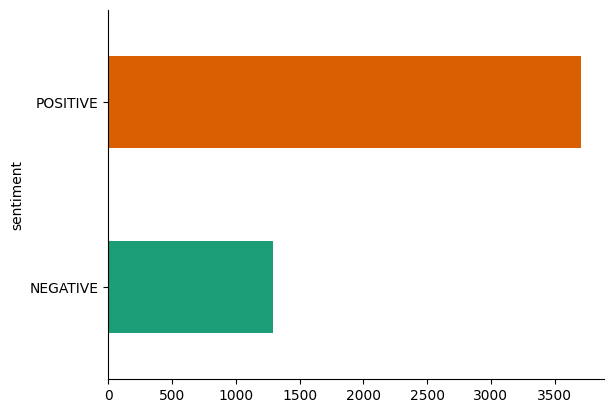

In [4]:
df_senti.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

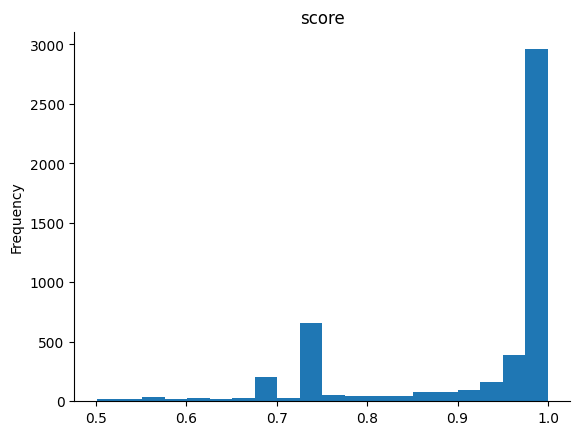

In [5]:
df_senti['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-6-d40d3e133b2d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_senti, x='score', y='sentiment', inner='box', palette='Dark2')


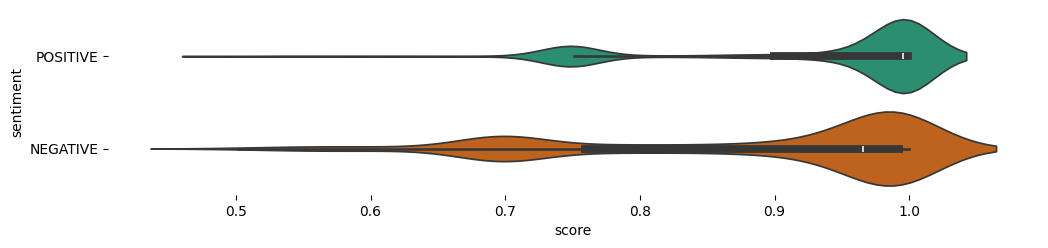

In [6]:
figsize = (12, 1.2 * len(df_senti['sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_senti, x='score', y='sentiment', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Hate Speech Recognition with Twitter data (labelled)

In [8]:
df = pd.read_csv("labeled_data.csv")
df['label'] = np.where(df['hate_speech'] > 0, 1, 0)
df = df[['tweet','label']]
train_df, val_df = train_test_split(df, test_size=0.1)

In [9]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class HateSpeechDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


MAX_LEN = 128
BATCH_SIZE = 16

train_dataset = HateSpeechDataset(
    texts=train_df.tweet.to_numpy(),
    labels=train_df.label.to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

train_data_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_dataset = HateSpeechDataset(
    texts=val_df.tweet.to_numpy(),
    labels=val_df.label.to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

val_data_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

### Model Training

Note: SKIP if loading the model directly.

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model = model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

for epoch in range(3):
    model.train()
    for batch in tqdm(train_data_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1394/1394 [07:38<00:00,  3.04it/s]


### Model Analysis


In [11]:
# Save model to device after optimization (RUN ONLY IF NOT LOADING MODEL FROM DEVICE DIRECTLY)
torch.save(model.state_dict(), "hate_speech_model.pt")

# Load model from device (RUN ONLY IF LOADING MODEL FROM DEVICE DIRECTLY)
'''model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.load_state_dict(torch.load('hate_speech_model.pt'))
model = model.to(device)'''


"model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)\nmodel.load_state_dict(torch.load('hate_speech_model.pt'))\nmodel = model.to(device)"

In [12]:
def evaluate_model(data_loader, model):
    model.eval()
    predictions, true_labels = [], []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            predictions.extend(torch.argmax(logits, dim=1).tolist())
            true_labels.extend(labels.tolist())

    print(classification_report(true_labels, predictions))

evaluate_model(val_data_loader, model)


              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1991
           1       0.66      0.37      0.48       488

    accuracy                           0.84      2479
   macro avg       0.76      0.66      0.69      2479
weighted avg       0.82      0.84      0.82      2479



In [13]:
class CommentDataset(Dataset):
    def __init__(self, comments, tokenizer, max_len):
        self.comments = comments
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.comments)

    def __getitem__(self, item):
        comment = str(self.comments[item])
        encoding = self.tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten()
        }


comment_dataset = CommentDataset(
    comments=df_senti['comment'].to_numpy(),
    tokenizer=tokenizer,
    max_len=MAX_LEN
)

comment_data_loader = DataLoader(
    comment_dataset,
    batch_size=BATCH_SIZE
)

def get_predictions(model, data_loader):
    model = model.eval()

    comments_texts = []
    predictions = []
    prediction_probs = []

    with torch.no_grad():
        for d in tqdm(data_loader):
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, preds = torch.max(outputs.logits, dim=1)
            predictions.extend(preds)
            prediction_probs.extend(outputs.logits)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    return predictions, prediction_probs

predictions, prediction_probs = get_predictions(model, comment_data_loader)

df_senti['predicted_label'] = predictions.numpy()


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 313/313 [00:36<00:00,  8.47it/s]


Comments classified as hate speech (predicted label = 1)

In [14]:
df_senti[df_senti['predicted_label']==1]

comment  \
105    16 YRS HELLO FROM THE OTHERSIDE JEWS GOVERNMENTS   
234                              its been 8 yeas now...   
481   Where is the translation into Arabic? Thank yo...   
524                    Where are the Arabs and Muslims?   
743                           half the world heard this   
879   THEY should remain with others at the camp or ...   
931                              Any Brazilians there?üòÖ   
1208                                it's ok to be white   
1212  It is precisely for your political opinions th...   
1370                              But we must be racist   
1658                          I am the only Arab here üò¢   
1806                               Stay with white men.   
2068  Everything you have songs I'm listening to eve...   
2309                      There is an Arab person there   
2592    Where are the Brazilians? We are the biggest!!!   
2639                                Free Palestinian üáµüá∏   
3109            Are there any Koreans watching in 2024?   
3227                             There are Arabs here üòÇ   
3264     This shit damn near brought a gangsta to tears   
3444                                        Transgender   
3740  Her choice of men explains her white guilt at ...   
3785                                         Black folk   
3852                               Any Brazilians here?   
3862                  niggas have nothing to do with it   
3930                                       Rubbish song   
4117                  Adele should have been born black   
4492  D ****** I'll cut off your cell phone everyone...   

                                        cleaned_comment sentiment     score  \
105                   yr hello otherside jew government  NEGATIVE  0.955505   
234                                                 yea  POSITIVE  0.772059   
481                   translation arabic thank ‚Äô racist  POSITIVE  0.739850   
524                                         arab muslim  POSITIVE  0.886006   
743                                    half world heard  POSITIVE  0.917445   
879      remain others camp carry white sign good alive  POSITIVE  0.993015   
931                                     brazilian [UNK]  POSITIVE  0.927320   
1208                                           ok white  POSITIVE  0.998833   
1212  precisely political opinion want whole world a...  POSITIVE  0.965624   
1370                                        must racist  NEGATIVE  0.999548   
1658                                         arab [UNK]  NEGATIVE  0.594145   
1806                                     stay white men  POSITIVE  0.935612   
2068  everything song im listening everything youre ...  POSITIVE  0.999352   
2309                                        arab person  NEGATIVE  0.724552   
2592                                  brazilian biggest  POSITIVE  0.999266   
2639                             free palestinian [UNK]  POSITIVE  0.971977   
3109                                    korean watching  POSITIVE  0.994125   
3227                                         arab [UNK]  NEGATIVE  0.594145   
3264                shit damn near brought gangsta tear  NEGATIVE  0.730219   
3444                                        transgender  NEGATIVE  0.944301   
3740  choice men explains white guilt award show gro...  NEGATIVE  0.825570   
3785                                         black folk  NEGATIVE  0.971163   
3852                                          brazilian  POSITIVE  0.997029   
3862                                      nigga nothing  NEGATIVE  0.997751   
3930                                       rubbish song  NEGATIVE  0.999758   
4117                                   adele born black  NEGATIVE  0.836239   
4492  ill cut cell phone everyone kill cell phone il...  NEGATIVE  0.999300   

      predicted_label  
105                 1  
234                 1  
481                 1  
524                 1  
743                 1  
879                 1

Frequency of labels

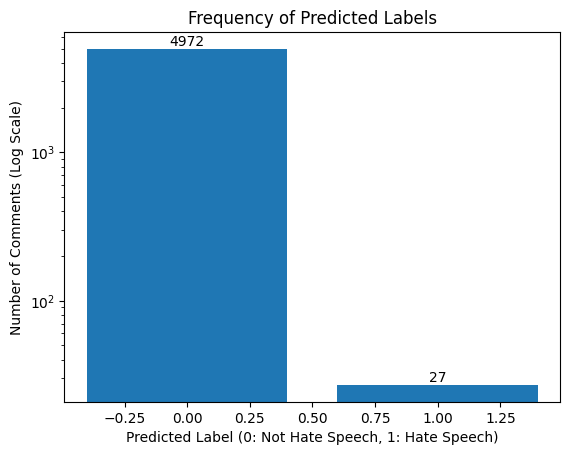

In [15]:
label_counts = df_senti['predicted_label'].value_counts()

plt.bar(label_counts.index, label_counts.values)
plt.yscale('log')

for i, count in enumerate(label_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Frequency of Predicted Labels')
plt.xlabel('Predicted Label (0: Not Hate Speech, 1: Hate Speech)')
plt.ylabel('Number of Comments (Log Scale)')

plt.show()


## Clustering
***An unsupervised approach***

In [16]:
comments = train_df['tweet'].astype(str).tolist()

# Parameters
max_features = 10000
maxlen = 100
embedding_dim = 32

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(comments)
sequences = tokenizer.texts_to_sequences(comments)

x_train = pad_sequences(sequences, maxlen=maxlen)

input_text = Input(shape=(maxlen,))
encoded = Dense(embedding_dim, activation='relu')(input_text)
decoded = Dense(maxlen, activation='sigmoid')(encoded)

autoencoder = Model(input_text, decoded)
encoder = Model(input_text, encoded)

autoencoder.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True)


Epoch 1/50
88/88 [==============================] - 3s 3ms/step - loss: -179231.1094
Epoch 2/50
88/88 [==============================] - 0s 3ms/step - loss: -1678702.8750
Epoch 3/50
88/88 [==============================] - 0s 3ms/step - loss: -5883994.5000
Epoch 4/50
88/88 [==============================] - 0s 3ms/step - loss: -12767574.0000
Epoch 5/50
88/88 [==============================] - 0s 3ms/step - loss: -22064746.0000
Epoch 6/50
88/88 [==============================] - 0s 3ms/step - loss: -33697340.0000
Epoch 7/50
88/88 [==============================] - 0s 3ms/step - loss: -47494628.0000
Epoch 8/50
88/88 [==============================] - 0s 3ms/step - loss: -63430332.0000
Epoch 9/50
88/88 [==============================] - 0s 3ms/step - loss: -81387312.0000
Epoch 10/50
88/88 [==============================] - 0s 3ms/step - loss: -101294488.0000
Epoch 11/50
88/88 [==============================] - 0s 3ms/step - loss: -123178800.0000
Epoch 12/50
88/88 [========================

In [17]:
comments = df_senti['cleaned_comment'].astype(str).tolist()

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(comments)
sequences = tokenizer.texts_to_sequences(comments)

x_train = pad_sequences(sequences, maxlen=maxlen)
comment_embeddings = encoder.predict(x_train)

157/157 [==============================] - 0s 1ms/step


In [18]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(comment_embeddings)

df_senti['cluster'] = kmeans.labels_
df_senti

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


comment  \
0                                     im here in 2024 .   
1     when i first heard of adele this was my favori...   
2                                                    Me   
3     This is how I protested. Triumph , natural bud...   
4            I want to bay this youtube I from somali üòÆ   
...                                                 ...   
4994                                               2024   
4995                             Anyone here in 2030üò¢üò¢üò¢   
4996  It's not what the song is about but.. I think ...   
4997                                                NaN   
4998  in the music video, a dark-skinned guy plays t...   

                                        cleaned_comment sentiment     score  \
0                                                    im  POSITIVE  0.743037   
1     first heard adele favorite song n still u love...  POSITIVE  0.983710   
2                                                   NaN  POSITIVE  0.748121   
3     protested triumph natural bud good friend stad...  POSITIVE  0.998206   
4                         want bay youtube somali [UNK]  NEGATIVE  0.966648   
...                                                 ...       ...       ...   
4994                                                NaN  POSITIVE  0.748121   
4995                                       anyone [UNK]  POSITIVE  0.870439   
4996  song think came around time dad died made cry ...  NEGATIVE  0.914363   
4997                                                NaN  POSITIVE  0.748121   
4998  music video darkskinned guy play role always p...  NEGATIVE  0.894220   

      predicted_label  cluster  
0                   0        0  
1                   0        0  
2                   0        0  
3                   0        1  
4                   0        3  
...               ...      ...  
4994                0        0  
4995                0        0  
4996                0        1  
4997                0        0  
4998                0        4  

[4999 rows x 6 columns]

Save or Load clustered data

In [44]:
#df_senti.to_csv('youtube_hello_comments_clustered.csv', index=False)
df_senti=pd.read_csv('/content/youtube_hello_comments_clustered.csv')


Percentage of Predicted Hate Speech within Each Cluster

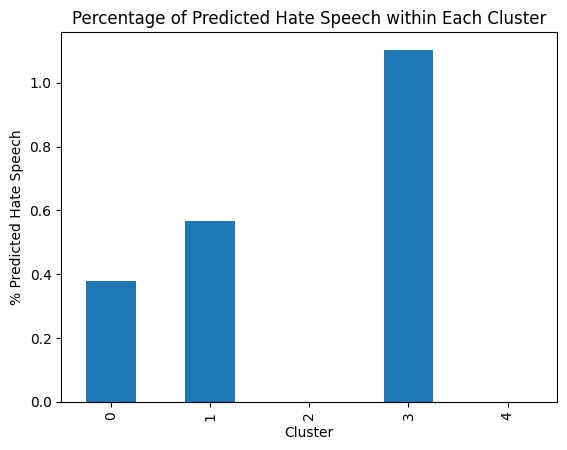

In [19]:
cluster_counts = df_senti.groupby('cluster')['predicted_label'].value_counts().unstack()
cluster_counts['% Hate Speech'] = cluster_counts[1] / (cluster_counts[0] + cluster_counts[1]) * 100

ax = cluster_counts['% Hate Speech'].plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('% Predicted Hate Speech')
plt.title('Percentage of Predicted Hate Speech within Each Cluster')
plt.show()

As a % of total hate speech

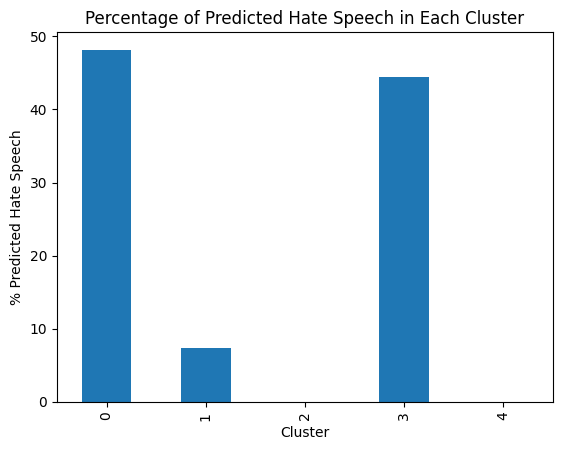

In [20]:
cluster_counts['% Hate Speech'] = cluster_counts[1] / label_counts[1] * 100

ax = cluster_counts['% Hate Speech'].plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('% Predicted Hate Speech')
plt.title('Percentage of Predicted Hate Speech in Each Cluster')
plt.show()

Clearly clusters 0 and 3 seem to be associated most with hate-speech.

<ipython-input-21-65b98de3e6eb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_senti, x='cluster', y='sentiment', inner='box', palette='Dark2')


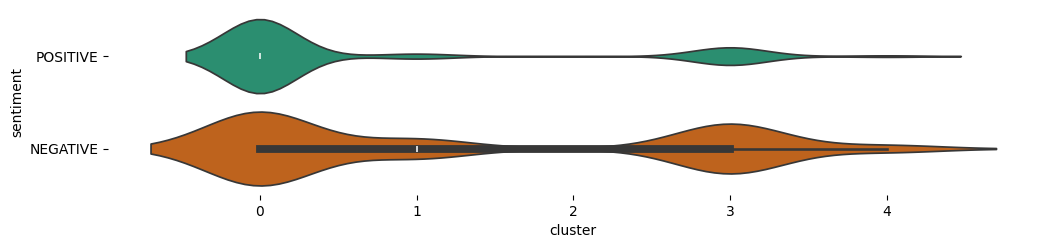

In [21]:
figsize = (12, 1.2 * len(df_senti['sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_senti, x='cluster', y='sentiment', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [22]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, comment_embeddings)
representative_comments = df_senti['cleaned_comment'].iloc[closest]


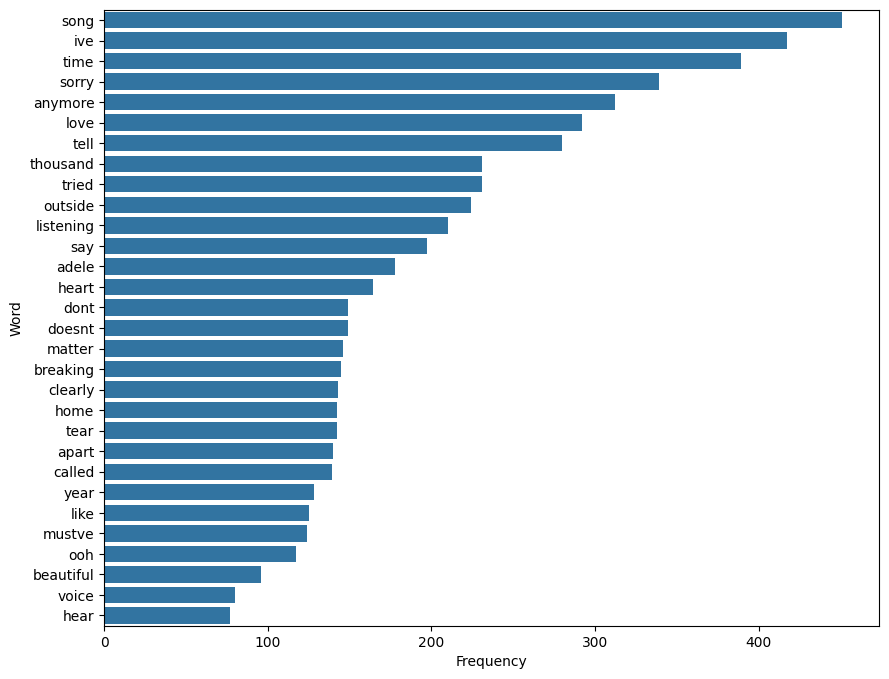

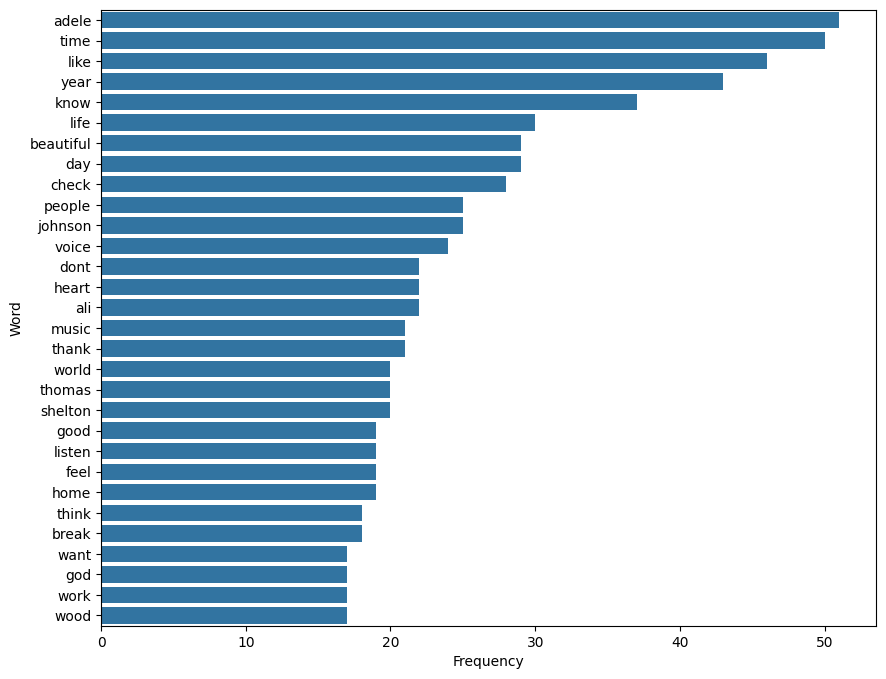

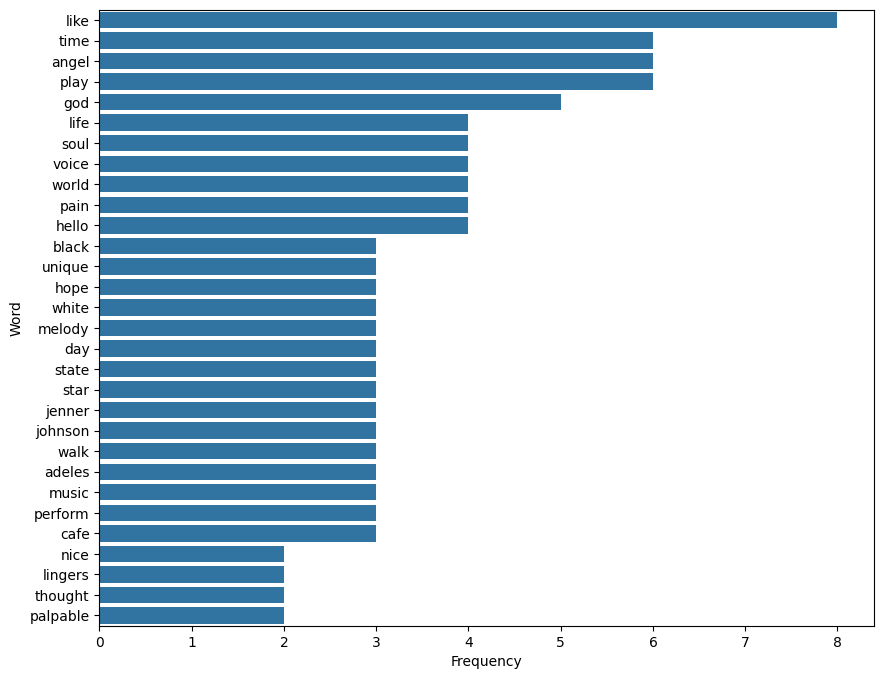

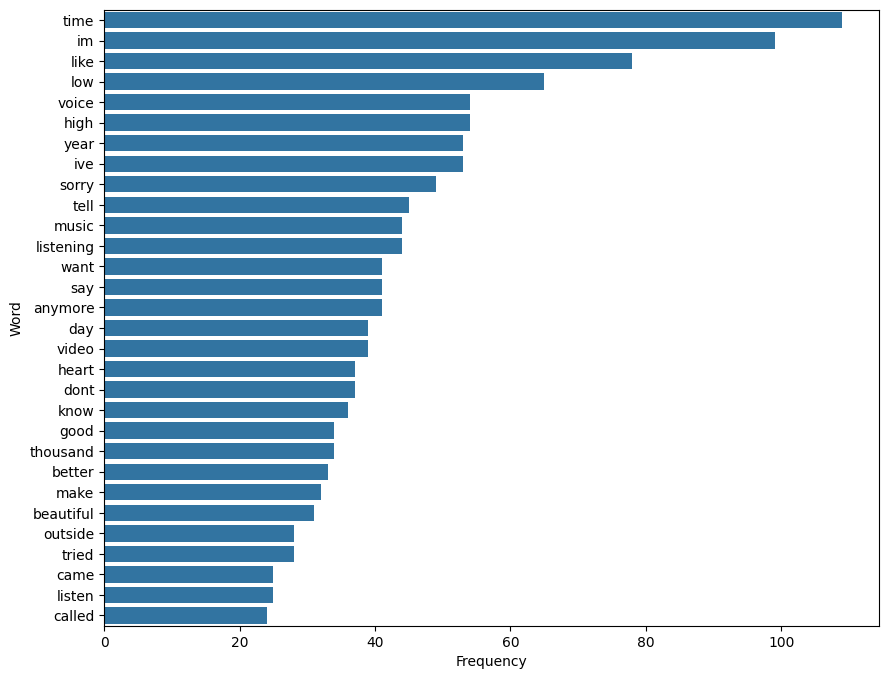

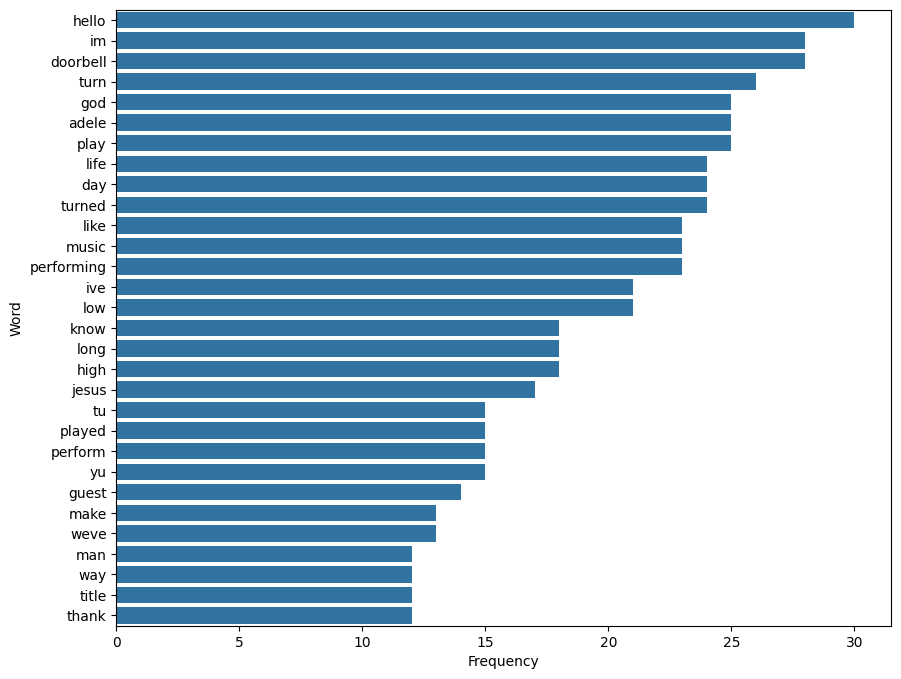

In [40]:
df_senti=df_senti[~pd.isna(df_senti['cleaned_comment'])]
vectorizer = CountVectorizer(stop_words='english')
for i in range(num_clusters):
  #ind = df_senti.iloc[(df_senti['cluster']==i) & (pd.Series.isna(df_senti['cleaned_comment']))]
  all_words = vectorizer.fit_transform(df_senti[df_senti['cluster']==i]['cleaned_comment'])
  sum_words = all_words.sum(axis=0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

  sorted_words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

  plt.figure(figsize=(10, 8))
  ax = sns.barplot(x=[w[1] for w in sorted_words_freq[5:35]], y=[w[0] for w in sorted_words_freq[5:35]])
  # plt.title('Top Words Across Cluster ',i)
  plt.xlabel('Frequency')
  plt.ylabel('Word')
  plt.show()


In [42]:
# Apply LDA topic modeling to each cluster
n_topics = 1
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)

for i in range(kmeans.n_clusters):
    cluster_comments = df_senti[df_senti['cluster'] == i]['cleaned_comment']
    cluster_vectorized = vectorizer.transform(cluster_comments)
    lda.fit(cluster_vectorized)

    for idx, topic in enumerate(lda.components_):
        print(f"Cluster {i}, Topic {idx}")
        print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-20:]])


Cluster 0, Topic 0
['doesnt', 'heart', 'adele', 'say', 'listening', 'outside', 'thousand', 'tried', 'tell', 'love', 'anymore', 'sorry', 'time', 'ive', 'song', 'im', 'high', 'low', 'hello', 'unk']
Cluster 1, Topic 0
['thank', 'music', 'heart', 'dont', 'voice', 'people', 'check', 'beautiful', 'day', 'life', 'know', 'year', 'like', 'time', 'adele', 'hello', 'im', 'love', 'song', 'unk']
Cluster 2, Topic 0
['perform', 'music', 'walk', 'adeles', 'world', 'soul', 'life', 'pain', 'hello', 'voice', 'god', 'angel', 'play', 'time', 'like', 'adele', 'song', 'love', 'unk', 'im']
Cluster 3, Topic 0
['anymore', 'want', 'say', 'music', 'listening', 'tell', 'sorry', 'ive', 'year', 'voice', 'high', 'low', 'like', 'im', 'time', 'hello', 'adele', 'love', 'song', 'unk']
Cluster 4, Topic 0
['ive', 'low', 'performing', 'music', 'like', 'turned', 'day', 'life', 'play', 'god', 'adele', 'turn', 'im', 'doorbell', 'hello', 'year', 'love', 'time', 'unk', 'song']
